In [1]:
import torch, torchvision

In [2]:
from torchvision.datasets import MNIST
from matplotlib import pyplot as plt
from einops import repeat

In [3]:
# !pip install einops

In [4]:
# data = MNIST("/datasets01/mnist-pytorch/11222017/")

In [5]:
# np.random.randint(0)

In [6]:
import numpy as np


def transform_dataset(dataset, target_size=56, scale=4):
    images = []
    targets = []
    rng = np.random.RandomState(42)
    for img, target in dataset:
        targets.append(target)
        img = np.asarray(img)
        image = np.zeros([target_size, target_size], dtype=img.dtype)
        shiftx = rng.randint(target_size - 28 + 1)
        shifty = rng.randint(target_size - 28 + 1)
        image[shiftx:shiftx + 28, shifty : shifty + 28] = img
        image = repeat(image, 'h w -> (h hr) (w wr)', hr=scale, wr=scale)
        images.append(image)
    return images, targets

In [8]:
images_test, target_test = transform_dataset( MNIST("/datasets01/mnist-pytorch/11222017/", train=False))
images_train, target_train = transform_dataset( MNIST("/datasets01/mnist-pytorch/11222017/", ))

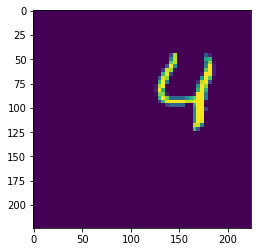

In [9]:
plt.imshow(images_test[4])

In [10]:
len(target_test), len(target_train)

(10000, 60000)

In [11]:
for n, target in enumerate(target_test):
    plt.imsave(f"/checkpoint/antares/experiments/fl_new_master/augposemb/vit/mnist_our/val/{target}/{n}.png", images_test[n])

In [12]:
for n, target in enumerate(target_train):
    plt.imsave(f"/checkpoint/antares/experiments/fl_new_master/augposemb/vit/mnist_our/train/{target}/{n}.png", images_train[n])

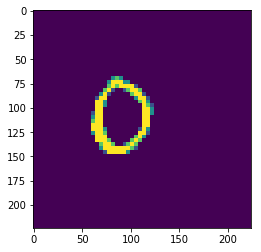

In [13]:
plt.imshow(plt.imread("/checkpoint/antares/experiments/fl_new_master/augposemb/vit/mnist_our/train/0/40428.png"))

In [14]:
images_test, target_test = transform_dataset( MNIST("/datasets01/mnist-pytorch/11222017/", train=False), scale=6)
images_train, target_train = transform_dataset( MNIST("/datasets01/mnist-pytorch/11222017/"), scale=6)

In [17]:
for n in range(10):
    !mkdir -p /checkpoint/antares/experiments/fl_new_master/augposemb/vit/mnist_our_336/val/$n
    !mkdir -p /checkpoint/antares/experiments/fl_new_master/augposemb/vit/mnist_our_336/train/$n
    
for n, target in enumerate(target_train):
    plt.imsave(f"/checkpoint/antares/experiments/fl_new_master/augposemb/vit/mnist_our_336/train/{target}/{n}.png", images_train[n])

for n, target in enumerate(target_test):
    plt.imsave(f"/checkpoint/antares/experiments/fl_new_master/augposemb/vit/mnist_our_336/val/{target}/{n}.png", images_test[n])

## Transformer with random patch 

In [57]:
def transform_dataset(dataset, target_size=56, scale=4):
    images = []
    targets = []
    rng = np.random.RandomState(42)
    all_img = [img for img, target in dataset]
    for img, target in dataset:
        targets.append(target)
        img = np.asarray(img)
        image = np.zeros([target_size, target_size], dtype=img.dtype)
        for i in range(14):
            for j in range(14):
                i_patch = rng.randint(7)
                j_patch = rng.randint(7)
                patch = np.zeros([28, 28], dtype=img.dtype)
                patch[:, :] = all_img[rng.randint(len(dataset))]
                image[i * 4 : (i + 1) * 4, j * 4 : (j + 1) * 4] = patch[i_patch * 4 : (i_patch + 1) * 4, j_patch * 4 : (j_patch + 1) * 4]
        shiftx = rng.randint(target_size - 28 + 1)
        shifty = rng.randint(target_size - 28 + 1)
        image[shiftx:shiftx + 28, shifty : shifty + 28] = img
        image = repeat(image, 'h w -> (h hr) (w wr)', hr=scale, wr=scale)
        images.append(image)
    return images, targets

In [58]:
images_test, target_test = transform_dataset( MNIST("/datasets01/mnist-pytorch/11222017/", train=False), scale=6)
images_train, target_train = transform_dataset( MNIST("/datasets01/mnist-pytorch/11222017/"), scale=6)

In [66]:
from einops import rearrange

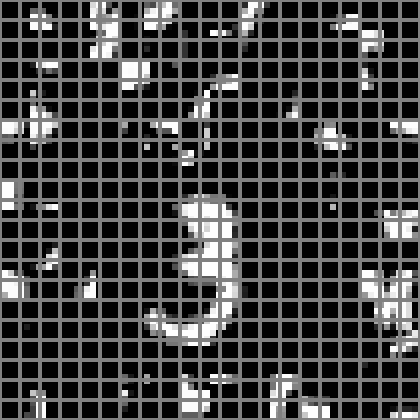

In [71]:
patches = rearrange(images_train[10], '(h h2) (w w2) -> h w h2 w2', h2=16, w2=16)
patches = np.pad(patches, [(0, 0), (0, 0), (2, 2), (2, 2)], constant_values=128)
patches = rearrange(patches, 'h w h2 w2 -> (h h2) (w w2)')
from PIL import Image

Image.fromarray(patches)

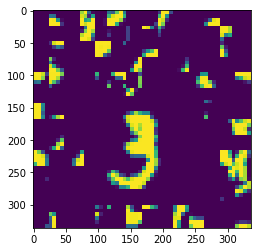

In [65]:

for i in range(14):
    for j in range(14)
        plt.imshow(images_train[10])

In [60]:
for n in range(10):
    !mkdir -p /checkpoint/antares/experiments/fl_new_master/augposemb/vit/mnist_our_random/val/$n
    !mkdir -p /checkpoint/antares/experiments/fl_new_master/augposemb/vit/mnist_our_random/train/$n
    
for n, target in enumerate(target_train):
    plt.imsave(f"/checkpoint/antares/experiments/fl_new_master/augposemb/vit/mnist_our_random/train/{target}/{n}.png", images_train[n])

for n, target in enumerate(target_test):
    plt.imsave(f"/checkpoint/antares/experiments/fl_new_master/augposemb/vit/mnist_our_random/val/{target}/{n}.png", images_test[n])

## Random shuffle patches

In [122]:
def shuffle_image(img, patch_size = 16):
    patches = rearrange(img, '(h h2) (w w2) -> (h w) h2 w2', h2=patch_size, w2=patch_size)
    patches = patches[np.random.permutation(len(patches))]
    h = int(patches.shape[0] ** 0.5)
    return rearrange(patches, '(h w) h2 w2 -> (h h2) (w w2)', w=h, h=h)

In [123]:
def transform_dataset_permute(dataset, target_size=56, scale=4, shuffle=False):
    images = []
    targets = []
    rng = np.random.RandomState(42)
    all_img = [img for img, target in dataset]
    for img, target in dataset:
        targets.append(target)
        img = np.asarray(img)
        image = np.zeros([target_size, target_size], dtype=img.dtype)
        for i in range(14):
            for j in range(14):
                i_patch = rng.randint(7)
                j_patch = rng.randint(7)
                patch = np.zeros([28, 28], dtype=img.dtype)
                patch[:, :] = all_img[rng.randint(len(dataset))]
                image[i * 4 : (i + 1) * 4, j * 4 : (j + 1) * 4] = patch[i_patch * 4 : (i_patch + 1) * 4, j_patch * 4 : (j_patch + 1) * 4]
        shiftx = rng.randint(target_size - 28 + 1)
        shifty = rng.randint(target_size - 28 + 1)
        image[shiftx:shiftx + 28, shifty : shifty + 28] = img
        image = repeat(image, 'h w -> (h hr) (w wr)', hr=scale, wr=scale)
        if shuffle:
            image = shuffle_image(image)
        images.append(image)
    return images, targets

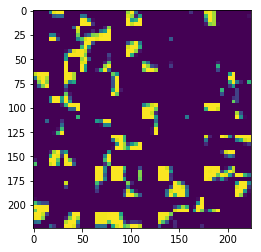

In [124]:
images_test, target_test = transform_dataset_permute( MNIST("/datasets01/mnist-pytorch/11222017/", train=False), scale=4, shuffle=True)
images_train, target_train = transform_dataset_permute( MNIST("/datasets01/mnist-pytorch/11222017/"), scale=4, shuffle=True)

plt.imshow(images_train[10])

for n in range(10):
    !mkdir -p /checkpoint/antares/experiments/fl_new_master/augposemb/vit/mnist_our_random_permute_224/val/$n
    !mkdir -p /checkpoint/antares/experiments/fl_new_master/augposemb/vit/mnist_our_random_permute_224/train/$n
    
for n, target in enumerate(target_train):
    plt.imsave(f"/checkpoint/antares/experiments/fl_new_master/augposemb/vit/mnist_our_random_permute_224/train/{target}/{n}.png", images_train[n])

for n, target in enumerate(target_test):
    plt.imsave(f"/checkpoint/antares/experiments/fl_new_master/augposemb/vit/mnist_our_random_permute_224/val/{target}/{n}.png", images_test[n])

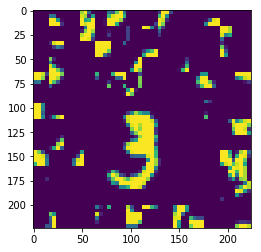

In [125]:
images_test, target_test = transform_dataset_permute( MNIST("/datasets01/mnist-pytorch/11222017/", train=False), scale=4)
images_train, target_train = transform_dataset_permute( MNIST("/datasets01/mnist-pytorch/11222017/"), scale=4)

plt.imshow(images_train[10])

for n in range(10):
    !mkdir -p /checkpoint/antares/experiments/fl_new_master/augposemb/vit/mnist_our_random_224/val/$n
    !mkdir -p /checkpoint/antares/experiments/fl_new_master/augposemb/vit/mnist_our_random_224/train/$n
    
for n, target in enumerate(target_train):
    plt.imsave(f"/checkpoint/antares/experiments/fl_new_master/augposemb/vit/mnist_our_random_224/train/{target}/{n}.png", images_train[n])

for n, target in enumerate(target_test):
    plt.imsave(f"/checkpoint/antares/experiments/fl_new_master/augposemb/vit/mnist_our_random_224/val/{target}/{n}.png", images_test[n])